In [51]:
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./data/measurements.csv')

In [3]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
data.specials.unique()

array([nan, 'AC rain', 'AC', 'rain', 'snow', 'AC snow',
       'half rain half sun', 'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun',
       'ac rain'], dtype=object)

In [5]:
data.gas_type.unique()

array(['E10', 'SP98'], dtype=object)

In [6]:
data['refill liters'].unique()

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

In [7]:
data['refill gas'].unique()

array(['E10', nan, 'SP98'], dtype=object)

In [8]:
data[data['refill gas'].isna()]['refill liters'].unique()

array([nan], dtype=object)

In [9]:
data[data['refill gas'] == 'SP98']['gas_type'].unique()

array(['SP98'], dtype=object)

In [10]:
data[data['refill gas'] == 'E10']['gas_type'].unique()

array(['E10'], dtype=object)

In [11]:
data['distance'].unique()

array(['28', '12', '11,2', '12,9', '18,5', '8,3', '7,8', '12,3', '4,9',
       '11,9', '12,4', '11,8', '24,7', '17,3', '33,4', '25,9', '25,3',
       '14,2', '17,9', '18,4', '18,3', '32,6', '19', '12,1', '20', '4,5',
       '11,7', '10,2', '5,4', '2', '16', '27,3', '10,6', '11,6', '13,1',
       '6,1', '153,5', '2,9', '2,1', '9,8', '6,8', '14', '13,9', '9,7',
       '24,8', '34,8', '5,2', '10,5', '13,2', '13', '12,2', '12,5',
       '15,7', '6,4', '5,3', '26,2', '18,8', '22,9', '162,7', '16,6',
       '15,9', '5,1', '22,4', '31,1', '16,1', '4,2', '17,4', '23,5', '7',
       '20,1', '20,8', '1,7', '35,9', '36,9', '16,8', '9,9', '36,6',
       '44,9', '21,6', '39,4', '26,6', '53,2', '18,9', '43,5', '16,4',
       '21,1', '22,7', '44,4', '35,8', '40,6', '14,1', '58,7', '16,2',
       '31,8', '51,6', '38,6', '81,2', '130,3', '67,2', '43,7', '56,1',
       '39', '38,5', '28,2', '19,6', '22,2', '13,6', '12,6', '8,7', '7,9',
       '2,4', '18,1', '1,3', '13,4', '12,8', '29', '31,4', '27,1', '

In [12]:
data.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

We change the decimal separator and change the type of these columns to float.

In [13]:
data['distance'] = data['distance'].str.replace(',', '.')
data['consume'] = data['consume'].str.replace(',', '.')
data['temp_inside'] = data['temp_inside'].str.replace(',', '.')

In [14]:
data['distance'] = data['distance'].astype(float)
data['consume'] = data['consume'].astype(float)
data['temp_inside'] = data['temp_inside'].astype(float)

In [15]:
data.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

Check nan values.

In [16]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

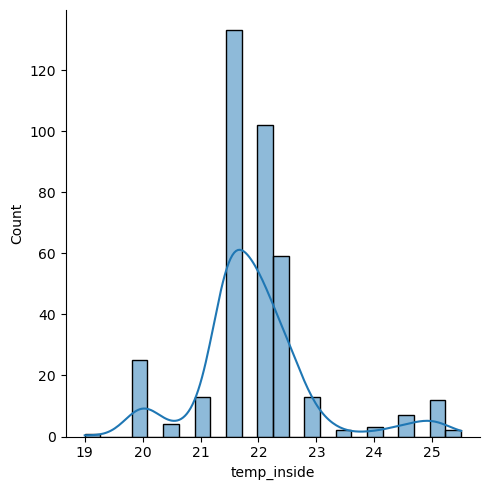

In [17]:
sns.displot(data['temp_inside'], kde=True)
plt.show

For the feature "temp_inside", we replace nan values with the mean.

In [18]:
temp_in_mean = data.temp_inside.mean()
data.temp_inside = data.temp_inside.fillna(temp_in_mean)

In [19]:
temp_in_mean

21.929521276595743

In [20]:
data.temp_inside.mean()

21.929521276595747

Mean consume for gas type.

In [21]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [22]:
data[data['gas_type'] == 'SP98']['consume'].mean()

4.899122807017544

In [23]:
data[data['gas_type'] == 'E10']['consume'].mean()

4.93125

Distance.

In [167]:
len(data[data['distance']<20])

295

In [168]:
data[(data['distance']<20)&(data['gas_type']  == 'SP98')]['consume'].mean()

4.979005524861878

In [170]:
data[(data['distance']<20)&(data['gas_type']  == 'E10')]['consume'].mean()

5.007894736842105

In [173]:
len(data[data['distance']<10])

57

In [172]:
data[(data['distance']<10)&(data['gas_type']  == 'SP98')]['consume'].mean()

5.957894736842104

In [171]:
data[(data['distance']<10)&(data['gas_type']  == 'E10')]['consume'].mean()

6.052631578947368

Speed.

In [174]:
len(data[data['speed']<40])

179

In [175]:
data[(data['speed']<40)&(data['gas_type']  == 'SP98')]['consume'].mean()

5.135964912280702

In [176]:
data[(data['speed']<40)&(data['gas_type']  == 'E10')]['consume'].mean()

5.250769230769231

In [177]:
len(data[data['speed']<35])

116

In [178]:
data[(data['speed']<35)&(data['gas_type']  == 'SP98')]['consume'].mean()

5.3896103896103895

In [179]:
data[(data['speed']<35)&(data['gas_type']  == 'E10')]['consume'].mean()

5.425641025641025

In [180]:
len(data[data['speed']<30])

76

In [181]:
data[(data['speed']<30)&(data['gas_type']  == 'SP98')]['consume'].mean()

5.820408163265307

In [182]:
data[(data['speed']<30)&(data['gas_type']  == 'E10')]['consume'].mean()

5.61111111111111

We take the current price of SP98 and E10 here in Spain as of 13/10/2023.

In [24]:
sp98_pr = 1.83
e10_pr = 1.78

In [25]:
data['l/km'] = data.consume / 100
data['fuel_consumed'] = data['l/km'] * data.distance

In [26]:
data['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [27]:
def cost_trip(row):
    if row['gas_type'] == 'E10':
        return row['fuel_consumed'] * e10_pr
    else:
        return row['fuel_consumed'] * sp98_pr

data['cost_trip'] = data.apply(cost_trip, axis=1)

In [28]:
data.cost_trip = round(data.cost_trip, 2)

Temp. diff.

In [29]:
data['temp_diff'] = data['temp_inside'] - data['temp_outside']

In [30]:
data.temp_diff = round(data.temp_diff, 1)

Cost of trip mean. SP98 vs E10.

In [31]:
data[data['gas_type'] == 'SP98']['cost_trip'].mean()

1.6170175438596495

In [32]:
data[data['gas_type'] == 'E10']['cost_trip'].mean()

1.7959375000000002

Describe numerical data.

In [36]:
data.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,l/km,fuel_consumed,cost_trip,temp_diff
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,0.049124,0.935294,1.690799,10.570361
std,22.667837,1.033172,13.598524,0.994666,6.991542,0.267443,0.329677,0.275441,0.010332,1.115967,2.024192,6.698654
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.033000,0.120000,0.210000,-8.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,0.043000,0.551650,0.990000,6.375000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,0.047000,0.680600,1.230000,11.500000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,0.053000,0.916500,1.662500,14.625000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,0.122000,11.453300,20.960000,26.000000


Save data to plot in Tableau.

In [35]:
# data.to_csv('data_0.csv', index=False)

How many data we have for AC, rain, sun.

In [37]:
len(data[(data['AC'] == 1)])

30

In [38]:
len(data[(data['rain'] == 1)])

48

In [166]:
len(data[(data['sun'] == 1)])

32

In [ ]:
data[data['temp_diff']>20]

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,l/km,fuel_consumed,cost_trip,temp_diff
11,11.8,4.6,38,21.5,0,NaN,E10,0,0,0,NaN,NaN,0.046,0.5428,0.97,21.5
21,14.2,5.9,38,21.5,1,NaN,E10,0,0,0,NaN,NaN,0.059,0.8378,1.49,20.5
22,17.9,5.7,37,21.5,1,NaN,E10,0,0,0,NaN,NaN,0.057,1.0203,1.82,20.5
23,11.8,4.7,36,21.5,1,NaN,E10,0,0,0,NaN,NaN,0.047,0.5546,0.99,20.5
26,18.4,5.7,21,22.5,2,NaN,E10,0,0,0,NaN,NaN,0.057,1.0488,1.87,20.5
28,18.3,5.5,29,21.5,1,NaN,E10,0,0,0,NaN,NaN,0.055,1.0065,1.79,20.5
106,162.7,5.5,75,23.0,1,NaN,SP98,0,0,0,45,SP98,0.055,8.9485,16.38,22.0
118,12.4,4.6,38,23.0,1,snow,SP98,0,1,0,NaN,NaN,0.046,0.5704,1.04,22.0
120,11.8,5.1,43,23.0,0,NaN,SP98,0,0,0,NaN,NaN,0.051,0.6018,1.10,23.0
121,12.2,5.8,58,23.0,2,NaN,SP98,0,0,0,NaN,NaN,0.058,0.7076,1.29,21.0


In [52]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas,l/km,fuel_consumed,cost_trip,temp_diff
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10,0.050,1.4000,2.49,9.5
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN,0.042,0.5040,0.90,8.5
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN,0.055,0.6160,1.10,6.5
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN,0.039,0.5031,0.90,7.5
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN,0.045,0.8325,1.48,6.5


Model.

In [146]:
X = data[['distance', 'speed', 'AC', 'rain', 'sun', 'temp_diff', 'gas_type']]
y = data['fuel_consumed']

Correlation.

In [147]:
corr_matr = X.corr(numeric_only=True)

<function matplotlib.pyplot.show(close=None, block=None)>

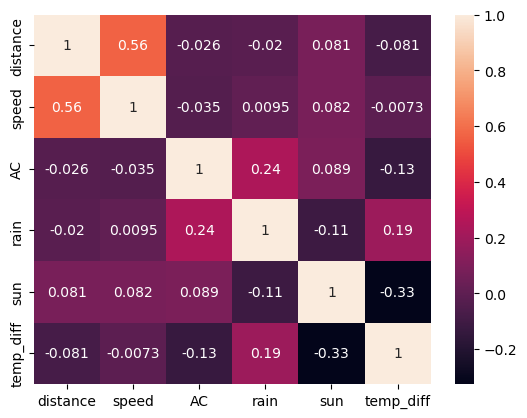

In [148]:
sns.heatmap(corr_matr, annot=True)
plt.show

Train-test split.

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Num, cat.

In [150]:
X_train_num = X_train[['distance', 'speed', 'AC', 'rain', 'sun', 'temp_diff']]
X_train_cat = X_train[['gas_type']]

In [152]:
X_test_num = X_test[['distance', 'speed', 'AC', 'rain', 'sun', 'temp_diff']]
X_test_cat = X_test[['gas_type']]

Scaling.

In [153]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [154]:
scaler.fit(X_train_num)

MinMaxScaler()

Train.

In [155]:
X_train_num_sc = pd.DataFrame(scaler.transform(X_train_num), index=X_train_num.index, columns=X_train_num.columns)

In [156]:
X_train_num_sc.isna().sum().sum()

0

Test.

In [157]:
X_test_num_sc = pd.DataFrame(scaler.transform(X_test_num), index=X_test_num.index, columns=X_test_num.columns)

In [158]:
X_test_num_sc.isna().sum().sum()

0

Encoding.

In [159]:
X_train_cat_enc = np.where(X_train_cat == 'SP98', 1, 0)
X_train_cat_enc_df = pd.DataFrame(X_train_cat_enc, index=X_train_cat.index, columns=["gas_type"])
X_test_cat_enc = np.where(X_test_cat == 'SP98', 1, 0)
X_test_cat_enc_df = pd.DataFrame(X_test_cat_enc, index=X_test_cat.index, columns=["gas_type"])

Concat.

In [160]:
X_train_tr = pd.concat([X_train_num_sc, X_train_cat_enc_df], axis=1)

In [161]:
X_train_tr.isna().sum().sum()

0

In [162]:
X_test_tr = pd.concat([X_test_num_sc, X_test_cat_enc_df], axis=1)

In [163]:
X_test_tr.isna().sum().sum()

0

In [164]:
X_train_tr

,distance,speed,AC,rain,sun,temp_diff,gas_type
192,0.050279,0.381579,0.0,0.0,0.0,0.786885,1
326,0.065642,0.381579,0.0,0.0,0.0,0.131148,0
282,0.068436,0.342105,0.0,0.0,0.0,0.655738,1
171,0.200652,0.315789,0.0,0.0,0.0,0.639344,0
380,0.032588,0.500000,0.0,0.0,0.0,0.114754,1
...,...,...,...,...,...,...,...
287,0.128026,0.276316,0.0,0.0,1.0,0.426230,1
113,0.098231,0.684211,0.0,0.0,0.0,0.639344,1
175,0.182961,0.394737,0.0,0.0,0.0,0.786885,0
329,0.079609,0.592105,0.0,0.0,0.0,0.131148,0


Model pipeline.

In [165]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

model1 = linear_model.LinearRegression()
model2 = RandomForestRegressor()
model3 = GradientBoostingRegressor()
model4 = XGBRegressor()
model5 = KNeighborsRegressor()

model_pipeline = [model1, model2, model3, model4, model5]
model_names = ['Linear Regression', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'XGBoost Regressor', 'KNeighbors Regressor']

scores_train = {}
scores_test = {} 

for model, model_name in zip(model_pipeline, model_names):
    train_scores = cross_val_score(model, X_train_tr, y_train, cv=5)
    test_scores = cross_val_score(model, X_test_tr, y_test, cv=5)
    
    scores_train[model_name] = train_scores.mean()
    scores_test[model_name] = test_scores.mean()

print("Train scores:")
print(scores_train)

print("\nTest scores:")
print(scores_test)

Train scores:
{'Linear Regression': 0.9533451678468033, 'Random Forest Regressor': 0.9343571675802356, 'Gradient Boosting Regressor': 0.9218176222093334, 'XGBoost Regressor': 0.9330834440674097, 'KNeighbors Regressor': 0.3378370742970268}

Test scores:
{'Linear Regression': 0.9291450408877517, 'Random Forest Regressor': 0.8691351407975159, 'Gradient Boosting Regressor': 0.8882114556597577, 'XGBoost Regressor': 0.8733815969827443, 'KNeighbors Regressor': 0.3350988637295681}


Linear Regression